In [1]:
from PIL import Image

In [6]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created June 26, 2023 for TRIPs-Py library
"""
__author__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"
# import os,sys
# sys.path.insert(0,'/Users/mirjetapasha/Documents/Research_Projects/TRIPSpy/TRIPSpy')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from trips.operators import *
##Specify the font
##Latex needs to be installed! If not installed, please comment the following 5 lines
# parameters = {'xtick.labelsize': 12, 'ytick.labelsize': 12,
#           'axes.titlesize': 18, 'axes.labelsize': 18, 'figure.titlesize': 14, 'legend.fontsize': 13}
# plt.rcParams.update(parameters)
import time
import numpy as np
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astra
# import phantoms as phantom
from venv import create
import pylops
from scipy.ndimage import convolve
from scipy import sparse
from scipy.ndimage import convolve
import scipy.special as spe
from trips.testProblems import *
from trips.operators import *
from trips.solvers.gks_all import *
from trips.solvers.Tikhonov import *
from trips.solvers.tSVD import *
from scipy import interpolate
# from trips.solvers.ArnoldiTikhonov import *

In [19]:
# Deblurring example test problem
Deblur = Deblurring()
# In the class Deblurring we have can define the type of problem to be used.
generate_matrix = 'False' #Defines a blurring operator where the forward operator matrix is formed explicitly
imagesize_x = 128 # Define the first dimension of the image
imagesize_y = 128 # Defines the second dimension of the image
spread = 1.5 # The PSF parameter
choose_image = 'satellite128' #The choice of the image
shape = (imagesize_x, imagesize_y)
x_true, nx, ny = Deblur.generate_true(choose_image)
# if generate_matrix == 'True':
#         # spread = [2,2]
#         size = imagesize_x
#         spreadnew = (spread, spread)
#         A = Deblur.forward_Op_matrix(spreadnew, shape, imagesize_x, imagesize_y)
# else:
#         A = Deblur.forward_Op([11,11], 0.5, imagesize_x, imagesize_y)
# b_true = Deblur.generate_data(x_true, generate_matrix)
# (b, delta) = Deblur.add_noise(b_true, 'Gaussian', noise_level = 0.01)
# Deblur.plot_rec(x_true.reshape((shape), order = 'F'), save_imgs = False, save_path='./saveImagesDeblurring'+'rec'+choose_image)

In [20]:
image = x_true.reshape((nx, ny))

In [23]:
X, Y = np.meshgrid(np.linspace(1, image.shape[1], n[0]), np.linspace(1, image.shape[0], n[1]))

In [25]:
X.shape
Y.shape

(32, 32)

In [26]:
# __author__ = 'Sergey Matyunin'
# import numpy as np
def interp2linear(z, xi, yi, extrapval=np.nan):
    """
    This function is obtained from this github repository: https://github.com/serge-m/pyinterp2 
    __author__ = 'Sergey Matyunin'
    Linear interpolation equivalent to interp2(z, xi, yi,'linear') in MATLAB
    @param z: function defined on square lattice [0..width(z))X[0..height(z))
    @param xi: matrix of x coordinates where interpolation is required
    @param yi: matrix of y coordinates where interpolation is required
    @param extrapval: value for out of range positions. default is numpy.nan
    @return: interpolated values in [xi,yi] points
    @raise Exception:
    """
    x = xi.copy()
    y = yi.copy()
    nrows, ncols = z.shape

    if nrows < 2 or ncols < 2:
        raise Exception("z shape is too small")

    if not x.shape == y.shape:
        raise Exception("sizes of X indexes and Y-indexes must match")


    # find x values out of range
    x_bad = ( (x < 0) | (x > ncols - 1))
    if x_bad.any():
        x[x_bad] = 0

    # find y values out of range
    y_bad = ((y < 0) | (y > nrows - 1))
    if y_bad.any():
        y[y_bad] = 0

    # linear indexing. z must be in 'C' order
    ndx = np.floor(y) * ncols + np.floor(x)
    ndx = ndx.astype('int32')

    # fix parameters on x border
    d = (x == ncols - 1)
    x = (x - np.floor(x))
    if d.any():
        x[d] += 1
        ndx[d] -= 1

    # fix parameters on y border
    d = (y == nrows - 1)
    y = (y - np.floor(y))
    if d.any():
        y[d] += 1
        ndx[d] -= ncols

    # interpolate
    one_minus_t = 1 - y
    z = z.ravel()
    f = (z[ndx] * one_minus_t + z[ndx + ncols] * y ) * (1 - x) + (
        z[ndx + 1] * one_minus_t + z[ndx + ncols + 1] * y) * x

    # Set out of range positions to extrapval
    if x_bad.any():
        f[x_bad] = extrapval
    if y_bad.any():
        f[y_bad] = extrapval
    return f


In [51]:
def check_imput_image_size(image):
    imshape = image.shape
    if imshape[1] == 1:
        nx = int(np.sqrt(imshape[0]))
        ny = int(np.sqrt(imshape[0]))
    else:
        nx = imshape[0]
        ny = imshape[1]
    newshape = (nx, ny)
    return newshape

In [52]:
shape_ = check_imput_image_size(im.reshape((-1,1)))
shape_

(1000, 1000)

(1000, 1000)

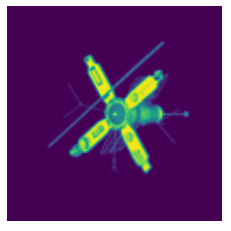

In [48]:
n = (1000,1000)
X, Y = np.meshgrid(np.linspace(1, image.shape[1], n[0]), np.linspace(1, image.shape[0], n[1]))
im = interp2linear(image, X, Y, extrapval=np.nan)
# imagenew = im / np.max(im)
plt.imshow(im)
plt.axis('off')
im.shape

In [18]:
# n = (32,32)
# # image = np.resize(image, n)
# X, Y = np.meshgrid(np.linspace(1, image.shape[1], n[0]), np.linspace(1, image.shape[0], n[1]))
# image = interpolate.interp2d(np.arange(1, image.shape[1]+1), np.arange(1, image.shape[0]+1), image, kind='linear')(X, Y)
# imagenew = image / np.max(image)

ValueError: x and y should both be 1-D arrays

In [16]:
import scipy.io as spio
path_package = '/Users/mirjetapasha/Documents/Research_Projects/TRIPS_June25/multiparameter_package'
dataa = spio.loadmat(path_package + '/demos/data/images/hubble.mat')

In [17]:
old_size = [nx, ny]

In [18]:
import matplotlib.pyplot as plt
def check_imagesize_toreshape(existingimage, chooseimage, old_size, newsize):
    path_package = '/Users/mirjetapasha/Documents/Research_Projects/TRIPS_June25/multiparameter_package'
    if (old_size[0] != newsize[0] or old_size[1] != newsize[1]):
        Deblur.plot_rec(existingimage.reshape((shape)), save_imgs = False)
        temp_im = Image.open(path_package + '/demos/data/images/'+chooseimage+'_'+str(newsize[0])+'.jpg')
        image_new =  np.array(temp_im.resize((newsize[0], newsize[1])))
        spio.savemat(path_package + '/demos/data/images/'+choose_image+'_'+str(newsize[0])+'.mat', mdict={'x_true': image_new})
    return image_new

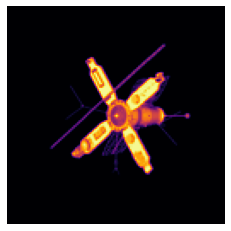

<Figure size 432x288 with 0 Axes>

In [19]:
newsize = [300, 300]
new_im = check_imagesize_toreshape(x_true, choose_image, old_size, newsize)

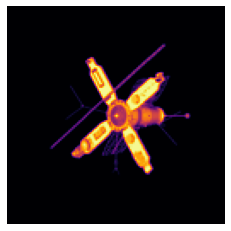

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_true.reshape((128, 128)))
plt.axis('off')
path_package = '/Users/mirjetapasha/Documents/Research_Projects/TRIPS_June25/multiparameter_package'
# plt.imsave(path_package + '/demos/data/images/hubble', bb, format="jpg", cmap="hot")
plt.savefig(path_package + '/demos/data/images/hubble'+'.jpg',bbox_inches='tight', pad_inches = 0)

In [21]:
image = Image.open(path_package + '/demos/data/images/hubble.jpg')

In [22]:
hubble_new = image.resize((400, 400))

In [27]:
hubble_new.shape()

AttributeError: shape

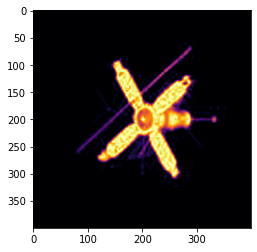

In [34]:
plt.imshow((dd[:, :, 0]))

In [28]:
dd = np.array(hubble_new)
dd

array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]]], dtype=uint8)

In [24]:
spio.savemat(path_package + '/demos/data/images/'+choose_image+'_'+str(newsize[0])+'.mat', mdict={'x_true':dd})

In [1]:
print('emily')


emily


In [2]:
print('1_Emoji.ipynb')

1_Emoji.ipynb
